In [4]:
import numpy as np
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
width = 28
height = 28

# 1. 데이터셋 생성하기
# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

ModuleNotFoundError: No module named 'keras'

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0].reshape((28, 28)), cmap=plt.cm.YlOrBr)
#print('Index %d: Label %d' % (0, test_labels[0]))

NameError: name 'x_test' is not defined

In [3]:
import numpy as np
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
width = 28
height = 28

# 1. 데이터셋 생성하기
# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width*height).astype('float32') / 255.0
x_test = x_test.reshape(10000, width*height).astype('float32') / 255.0

# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

# 데이터셋 전처리 : one-hot 인코딩
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(256, input_dim=width*height, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))



Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 16s 329us/sample - loss: 0.6749 - acc: 0.8208 - val_loss: 0.3260 - val_acc: 0.9076
Epoch 2/30
50000/50000 [==============================] - 16s 322us/sample - loss: 0.2802 - acc: 0.9189 - val_loss: 0.2164 - val_acc: 0.9380
Epoch 3/30
50000/50000 [==============================] - 16s 325us/sample - loss: 0.2186 - acc: 0.9366 - val_loss: 0.1803 - val_acc: 0.9496
Epoch 4/30
50000/50000 [==============================] - 18s 361us/sample - loss: 0.1805 - acc: 0.9478 - val_loss: 0.1567 - val_acc: 0.9573
Epoch 5/30
50000/50000 [==============================] - 16s 328us/sample - loss: 0.1529 - acc: 0.9556 - val_loss: 0.1377 - val_acc: 0.9620
Epoch 6/30
50000/50000 [==============================] - 17s 348us/sample - loss: 0.1324 - acc: 0.9615 - val_loss: 0.1341 - val_acc: 0.9608
Epoch 7/30
50000/50000 [==============================] - 19s 388us/sample - loss: 0.1168 - acc: 0.9665 

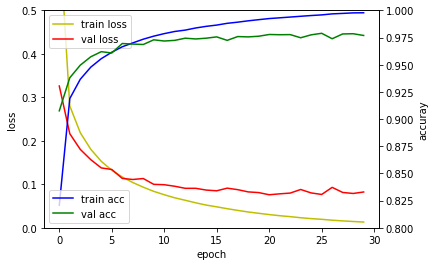

10000/10000 [==============================] - 2s 168us/sample - loss: 0.0744 - acc: 0.9782
## evaluation loss and_metrics ##
[0.07436429007949773, 0.9782]


In [5]:
# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.5])
acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.8, 1.0])
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

# 7. 모델 사용하기
yhat_test = model.predict(x_test, batch_size=32)



In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width*height).astype('float32') / 255.0
x_test = x_test.reshape(10000, width*height).astype('float32') / 255.0

# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

# 데이터셋 전처리 : one-hot 인코딩
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

In [25]:
from sklearn import datasets, tree
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)  
predictions = clf.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))  

0.8703


In [ ]:
pred = np.where(predictions == 1)[1]
print(pred[:10])

In [ ]:
ans = np.where(y_test == 1)[1]
print(ans[:10])

In [29]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()   
clf.fit(x_test, y_test)  
predictions = clf.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions)) 

0.9658


In [40]:
pred = np.where(predictions == 1)[1]
print(pred[:10])

[7 2 1 0 4 1 4 9 5 9]


In [41]:
ans = np.where(y_test == 1)[1]
print(ans[:10])

[7 2 1 0 4 1 4 9 5 9]


In [ ]:
# 무작위
from sklearn import datasets
digits = datasets.load_digits()
import random
class myKNN():
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    def predict(self, X_test):
        predictions = []
        for row in X_test:
            label = random.choice(self.y_train) 
            predictions.append(label)
        return predictions
clf = myKNN()   # 나만의 구분자를 사용!
clf.fit(data, labels)  
predictions = clf.predict(test_data)
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, predictions)) 